In [583]:
import datetime as dt 
import requests 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings("ignore")

In [584]:
driver = "hamilton"
url = f"https://ergast.com/api/f1/drivers/{driver}/qualifying.json?limit=500"
response = requests.get(url)

In [585]:
r = response.json()

In [587]:
pd.set_option('display.max_columns', 500)

In [588]:
data = pd.json_normalize(r["MRData"]["RaceTable"]["Races"])
data.head()

,season,round,url,raceName,date,time,QualifyingResults,Circuit.circuitId,Circuit.url,Circuit.circuitName,Circuit.Location.lat,Circuit.Location.long,Circuit.Location.locality,Circuit.Location.country
0,2007,1,http://en.wikipedia.org/wiki/2007_Australian_G...,Australian Grand Prix,2007-03-18,03:00:00Z,"[{'number': '2', 'position': '4', 'Driver': {'...",albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia
1,2007,2,http://en.wikipedia.org/wiki/2007_Malaysian_Gr...,Malaysian Grand Prix,2007-04-08,07:00:00Z,"[{'number': '2', 'position': '4', 'Driver': {'...",sepang,http://en.wikipedia.org/wiki/Sepang_Internatio...,Sepang International Circuit,2.76083,101.738,Kuala Lumpur,Malaysia
2,2007,3,http://en.wikipedia.org/wiki/2007_Bahrain_Gran...,Bahrain Grand Prix,2007-04-15,11:30:00Z,"[{'number': '2', 'position': '2', 'Driver': {'...",bahrain,http://en.wikipedia.org/wiki/Bahrain_Internati...,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain
3,2007,4,http://en.wikipedia.org/wiki/2007_Spanish_Gran...,Spanish Grand Prix,2007-05-13,12:00:00Z,"[{'number': '2', 'position': '4', 'Driver': {'...",catalunya,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,Circuit de Barcelona-Catalunya,41.57,2.26111,Montmeló,Spain
4,2007,5,http://en.wikipedia.org/wiki/2007_Monaco_Grand...,Monaco Grand Prix,2007-05-27,12:00:00Z,"[{'number': '2', 'position': '2', 'Driver': {'...",monaco,http://en.wikipedia.org/wiki/Circuit_de_Monaco,Circuit de Monaco,43.7347,7.42056,Monte-Carlo,Monaco


In [589]:
quali = pd.json_normalize(data["QualifyingResults"])
qualidata = quali[0].apply(pd.Series)

In [590]:
r

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.5',
  'series': 'f1',
  'url': 'http://ergast.com/api/f1/drivers/hamilton/qualifying.json',
  'limit': '500',
  'offset': '0',
  'total': '303',
  'RaceTable': {'driverId': 'hamilton',
   'Races': [{'season': '2007',
     'round': '1',
     'url': 'http://en.wikipedia.org/wiki/2007_Australian_Grand_Prix',
     'raceName': 'Australian Grand Prix',
     'Circuit': {'circuitId': 'albert_park',
      'url': 'http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit',
      'circuitName': 'Albert Park Grand Prix Circuit',
      'Location': {'lat': '-37.8497',
       'long': '144.968',
       'locality': 'Melbourne',
       'country': 'Australia'}},
     'date': '2007-03-18',
     'time': '03:00:00Z',
     'QualifyingResults': [{'number': '2',
       'position': '4',
       'Driver': {'driverId': 'hamilton',
        'permanentNumber': '44',
        'code': 'HAM',
        'url': 'http://en.wikipedia.org/wiki/Lewis_Hamilton',
        'givenName': '

In [591]:
data_merged = pd.merge(left=data,right=qualidata, left_index=True, right_index=True)

In [592]:
data_merged.columns

Index(['season', 'round', 'url', 'raceName', 'date', 'time',
       'QualifyingResults', 'Circuit.circuitId', 'Circuit.url',
       'Circuit.circuitName', 'Circuit.Location.lat', 'Circuit.Location.long',
       'Circuit.Location.locality', 'Circuit.Location.country', 'number',
       'position', 'Q1', 'Q2', 'Q3', 'Driver.driverId',
       'Driver.permanentNumber', 'Driver.code', 'Driver.url',
       'Driver.givenName', 'Driver.familyName', 'Driver.dateOfBirth',
       'Driver.nationality', 'Constructor.constructorId', 'Constructor.url',
       'Constructor.name', 'Constructor.nationality'],
      dtype='object')

In [593]:
data_merged = data_merged[['season', 'round', 'Driver.familyName','raceName', 'date', 'Circuit.circuitId',
       'Circuit.circuitName','position','Q1', 'Q2', 'Q3',  'Circuit.Location.locality', 'Circuit.Location.country','Circuit.Location.lat', 'Circuit.Location.long','number',
       'Constructor.constructorId', 'Constructor.name',
       'Constructor.nationality']]

In [594]:
data_merged[['season', 'round', 'position', 'number']] = data_merged[['season', 'round', 'position', 'number']].astype("Int64")
data_merged[['Circuit.Location.lat', 'Circuit.Location.long']] = data_merged[['Circuit.Location.lat', 'Circuit.Location.long']].astype("float")
data_merged['date'] = data_merged['date'].astype("datetime64[ns]")

In [595]:
import numpy as np
data_merged["Q1"][data_merged["Q1"] == ''] = np.nan

In [596]:
for i in ["Q1","Q2","Q3"]:
    data_merged[[f"{i}_minutes",f"{i}_seconds"]] = data_merged[i].str.split(":",expand=True)
for i in ["Q1","Q2","Q3"]:
    data_merged[f"{i}_minutes"] = data_merged[f"{i}_minutes"].astype("Int64")
    data_merged[f"{i}_seconds"] = data_merged[f"{i}_seconds"].astype("float")
for i in ["Q1","Q2","Q3"]:
    data_merged[f"{i}_minutes_together"] = data_merged[f"{i}_minutes"] + data_merged[f"{i}_seconds"]/60
for i in ["Q1","Q2","Q3"]:
    data_merged[f"{i}_minutes"] = data_merged[f"{i}_minutes"].astype("Int64")
data_merged.drop(columns=['Q1_minutes', 'Q1_seconds', 'Q2_minutes',
       'Q2_seconds', 'Q3_minutes', 'Q3_seconds'],inplace=True)
data_merged

,season,round,Driver.familyName,raceName,date,Circuit.circuitId,Circuit.circuitName,position,Q1,Q2,Q3,Circuit.Location.locality,Circuit.Location.country,Circuit.Location.lat,Circuit.Location.long,number,Constructor.constructorId,Constructor.name,Constructor.nationality,Q1_minutes_together,Q2_minutes_together,Q3_minutes_together
0,2007,1,Hamilton,Australian Grand Prix,2007-03-18,albert_park,Albert Park Grand Prix Circuit,4,1:26.674,1:25.577,1:26.755,Melbourne,Australia,-37.84970,144.96800,2,mclaren,McLaren,British,1.444567,1.426283,1.445917
1,2007,2,Hamilton,Malaysian Grand Prix,2007-04-08,sepang,Sepang International Circuit,4,1:35.028,1:34.650,1:36.045,Kuala Lumpur,Malaysia,2.76083,101.73800,2,mclaren,McLaren,British,1.5838,1.5775,1.60075
2,2007,3,Hamilton,Bahrain Grand Prix,2007-04-15,bahrain,Bahrain International Circuit,2,1:32.580,1:31.752,1:32.935,Sakhir,Bahrain,26.03250,50.51060,2,mclaren,McLaren,British,1.543,1.5292,1.548917
3,2007,4,Hamilton,Spanish Grand Prix,2007-05-13,catalunya,Circuit de Barcelona-Catalunya,4,1:21.120,1:20.713,1:21.785,Montmeló,Spain,41.57000,2.26111,2,mclaren,McLaren,British,1.352,1.345217,1.363083
4,2007,5,Hamilton,Monaco Grand Prix,2007-05-27,monaco,Circuit de Monaco,2,1:15.685,1:15.479,1:15.905,Monte-Carlo,Monaco,43.73470,7.42056,2,mclaren,McLaren,British,1.261417,1.257983,1.265083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2022,11,Hamilton,Austrian Grand Prix,2022-07-10,red_bull_ring,Red Bull Ring,9,1:06.079,1:05.475,1:13.151,Spielberg,Austria,47.21970,14.76470,44,mercedes,Mercedes,German,1.101317,1.09125,1.219183
299,2022,12,Hamilton,French Grand Prix,2022-07-24,ricard,Circuit Paul Ricard,4,1:33.041,1:32.274,1:31.765,Le Castellet,France,43.25060,5.79167,44,mercedes,Mercedes,German,1.550683,1.5379,1.529417
300,2022,13,Hamilton,Hungarian Grand Prix,2022-07-31,hungaroring,Hungaroring,7,1:18.374,1:18.035,1:18.142,Budapest,Hungary,47.57890,19.24860,44,mercedes,Mercedes,German,1.306233,1.300583,1.302367
301,2022,14,Hamilton,Belgian Grand Prix,2022-08-28,spa,Circuit de Spa-Francorchamps,7,1:45.736,1:45.420,1:45.503,Spa,Belgium,50.43720,5.97139,44,mercedes,Mercedes,German,1.762267,1.757,1.758383


In [597]:
data_merged.dtypes

season                                Int64
round                                 Int64
Driver.familyName                    object
raceName                             object
date                         datetime64[ns]
Circuit.circuitId                    object
Circuit.circuitName                  object
position                              Int64
Q1                                   object
Q2                                   object
Q3                                   object
Circuit.Location.locality            object
Circuit.Location.country             object
Circuit.Location.lat                float64
Circuit.Location.long               float64
number                                Int64
Constructor.constructorId            object
Constructor.name                     object
Constructor.nationality              object
Q1_minutes_together                 Float64
Q2_minutes_together                 Float64
Q3_minutes_together                 Float64
dtype: object

In [598]:
data_merged.head()

,season,round,Driver.familyName,raceName,date,Circuit.circuitId,Circuit.circuitName,position,Q1,Q2,Q3,Circuit.Location.locality,Circuit.Location.country,Circuit.Location.lat,Circuit.Location.long,number,Constructor.constructorId,Constructor.name,Constructor.nationality,Q1_minutes_together,Q2_minutes_together,Q3_minutes_together
0,2007,1,Hamilton,Australian Grand Prix,2007-03-18,albert_park,Albert Park Grand Prix Circuit,4,1:26.674,1:25.577,1:26.755,Melbourne,Australia,-37.84970,144.96800,2,mclaren,McLaren,British,1.444567,1.426283,1.445917
1,2007,2,Hamilton,Malaysian Grand Prix,2007-04-08,sepang,Sepang International Circuit,4,1:35.028,1:34.650,1:36.045,Kuala Lumpur,Malaysia,2.76083,101.73800,2,mclaren,McLaren,British,1.5838,1.5775,1.60075
2,2007,3,Hamilton,Bahrain Grand Prix,2007-04-15,bahrain,Bahrain International Circuit,2,1:32.580,1:31.752,1:32.935,Sakhir,Bahrain,26.03250,50.51060,2,mclaren,McLaren,British,1.543,1.5292,1.548917
3,2007,4,Hamilton,Spanish Grand Prix,2007-05-13,catalunya,Circuit de Barcelona-Catalunya,4,1:21.120,1:20.713,1:21.785,Montmeló,Spain,41.57000,2.26111,2,mclaren,McLaren,British,1.352,1.345217,1.363083
4,2007,5,Hamilton,Monaco Grand Prix,2007-05-27,monaco,Circuit de Monaco,2,1:15.685,1:15.479,1:15.905,Monte-Carlo,Monaco,43.73470,7.42056,2,mclaren,McLaren,British,1.261417,1.257983,1.265083


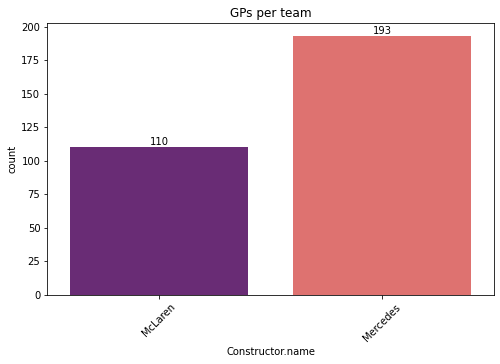

In [599]:
plt.figure(figsize=(8,5))
plt.title("GPs per team")
zz = sns.countplot(x="Constructor.name",data=data_merged,palette="magma")
zz.bar_label(zz.containers[0])
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

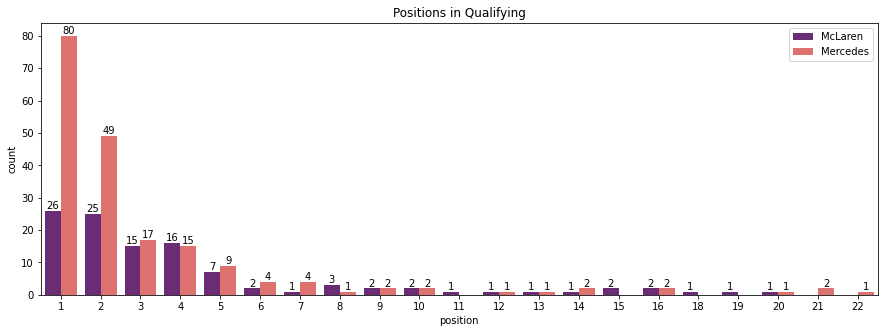

In [600]:
plt.figure(figsize=(15,5))
plt.title("Positions in Qualifying")
zz = sns.countplot(x="position", data=data_merged,palette="magma",hue="Constructor.name")
for i in range(len(zz.containers)):
    zz.bar_label(zz.containers[i])
plt.ylabel("count")
plt.legend(loc="upper right")
plt.show()

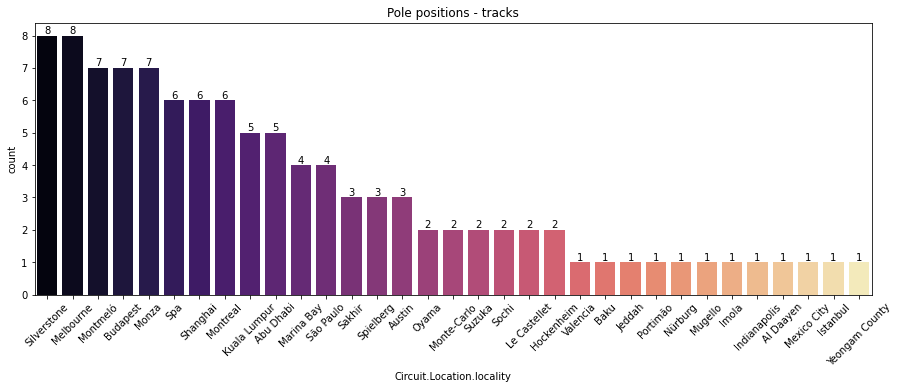

In [601]:
plt.figure(figsize=(15,5))
plt.title("Pole positions - tracks")
zz = sns.barplot(x="Circuit.Location.locality",y="date", data=data_merged[data_merged["position"] == 1].groupby("Circuit.Location.locality")["date"].count().to_frame().sort_values(by="date",ascending=False).reset_index(),palette="magma")
zz.bar_label(zz.containers[0])
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

In [602]:
data_merged.groupby(["Circuit.circuitName","Circuit.Location.country"]).agg({"Q3_minutes_together":["mean","max","min"],}).reset_index()

Circuit.circuitName Circuit.Location.country  \
                                                                    
0         Albert Park Grand Prix Circuit                Australia   
1          Autodromo Enzo e Dino Ferrari                    Italy   
2   Autodromo Internazionale del Mugello                    Italy   
3           Autodromo Nazionale di Monza                    Italy   
4           Autódromo Hermanos Rodríguez                   Mexico   
5     Autódromo Internacional do Algarve                 Portugal   
6             Autódromo José Carlos Pace                   Brazil   
7          Bahrain International Circuit                  Bahrain   
8                      Baku City Circuit               Azerbaijan   
9            Buddh International Circuit                    India   
10             Circuit Gilles Villeneuve                   Canada   
11                Circuit Park Zandvoort              Netherlands   
12                   Circuit Paul Ricard                   France   
13        Circuit de Barcelona-Catalunya                    Spain   
14                     Circuit de Monaco                   Monaco   
15         Circuit de Nevers Magny-Cours                   France   
16          Circuit de Spa-Francorchamps                  Belgium   
17               Circuit of the Americas                      USA   
18                         Fuji Speedway                    Japan   
19                        Hockenheimring                  Germany   
20                           Hungaroring                  Hungary   
21           Indianapolis Motor Speedway                      USA   
22                         Istanbul Park                   Turkey   
23               Jeddah Corniche Circuit             Saudi Arabia   
24          Korean International Circuit                    Korea   
25          Losail International Circuit                    Qatar   
26             Marina Bay Street Circuit                Singapore   
27         Miami International Autodrome                      USA   
28                           Nürburgring                  Germany   
29                         Red Bull Ring                  Austria   
30          Sepang International Circuit                 Malaysia   
31        Shanghai International Circuit                    China   
32                   Silverstone Circuit                       UK   
33                        Sochi Autodrom                   Russia   
34                        Suzuka Circuit                    Japan   
35               Valencia Street Circuit                    Spain   
36                    Yas Marina Circuit                      UAE   

   Q3_minutes_together                      
                  mean       max       min  
0              1.42756  1.737183   1.31375  
1             1.234308  1.240183  1.228433  
2               1.2524    1.2524    1.2524  
3             1.380553  1.592567  1.314783  
4             1.281894    1.3278  1.248233  
5             1.291725  1.305917  1.277533  
6             1.206028  1.461283   1.12135  
7             1.543932  1.920283    1.4544  
8             1.747644  2.032567    1.6759  
9             1.416439  1.425733    1.4079  
10            1.256169    1.4252    1.1741  
11            1.163092  1.177467  1.148717  
12            1.501504  1.529417  1.471983  
13            1.338588  1.420533  1.259733  
14            1.230958  1.267467  1.169433  
15            1.264975  1.278217  1.251733  
16             1.83527  2.096983  1.687533  
17            1.573621  1.622417  1.537283  
18            1.364767    1.4228  1.306733  
19            1.335517  1.736433  1.196117  
20            1.332897    1.5943  1.224117  
21            1.205517  1.205517  1.205517  
22            1.507644     1.876  1.381133  
23            1.458517  1.458517  1.458517  
24            1.611546  1.624483     1.597  
25            1.347117  1.347117  1.347117  
26            1.722458  1.798183   1.60025  
27             1.49375  

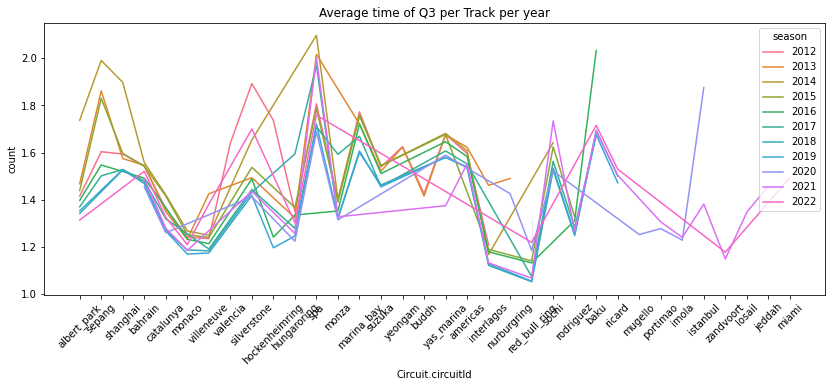

In [603]:
plt.figure(figsize=(14,5))
plt.title("Average time of Q3 per Track per year")
sns.lineplot(x="Circuit.circuitId",y="Q3_minutes_together",data=data_merged[data_merged["season"].astype("int") >= (data_merged["season"].astype("int").max() - 10)],hue=data_merged["season"][data_merged["season"].astype("int") >= (data_merged["season"].astype("int").max() - 10)].astype("category"))
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

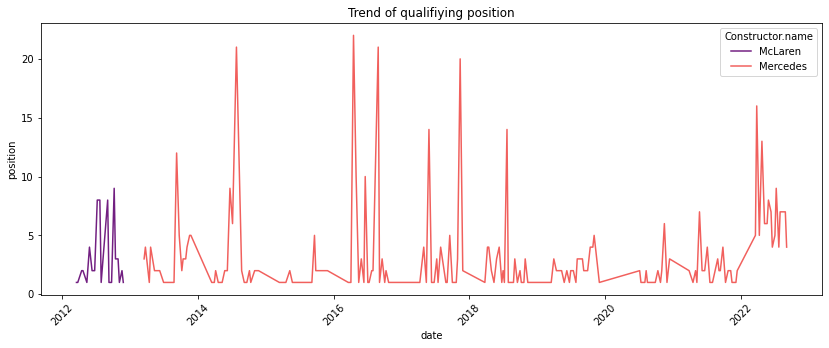

In [604]:
plt.figure(figsize=(14,5))
plt.title("Trend of qualifiying position")
sns.lineplot(x="date",y="position",data=data_merged[data_merged["season"].astype("int") >= (data_merged["season"].astype("int").max() - 10)],hue="Constructor.name",palette="magma")
plt.ylabel("position")
plt.xticks(rotation=45)
plt.show()

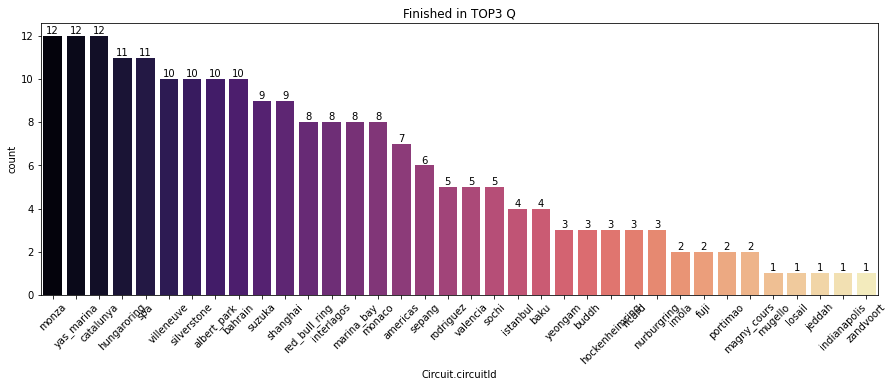

In [605]:
plt.figure(figsize=(15,5))
plt.title("Finished in TOP3 Q")
zz = sns.barplot(x="Circuit.circuitId",y="position", data=data_merged[data_merged["position"].isin([1,2,3])].groupby("Circuit.circuitId")["position"].count().to_frame().sort_values(by="position",ascending=False).reset_index(),palette="magma")
zz.bar_label(zz.containers[0])
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

In [607]:
best = data_merged.groupby(["Circuit.circuitId","season"]).agg({"Q3_minutes_together":"min"}).reset_index().sort_values(by="Q3_minutes_together").drop_duplicates("Circuit.circuitId")
best["circ_season"] = best['Circuit.circuitId'] + best['season'].astype(str)

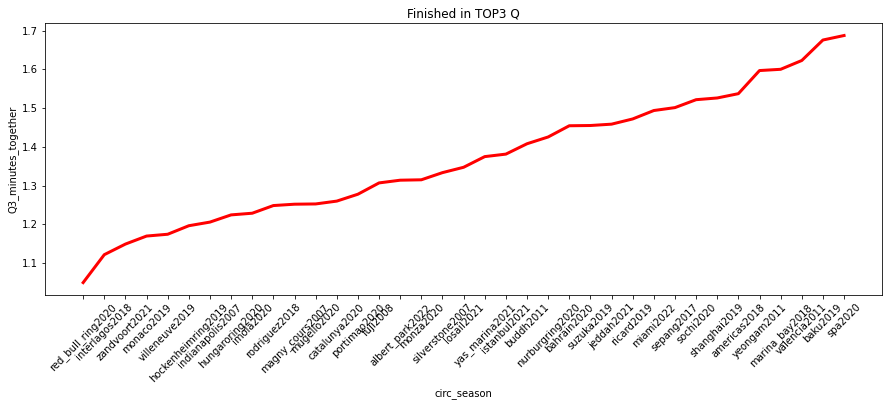

In [613]:
plt.figure(figsize=(15,5))
plt.title("Finished in TOP3 Q")
sns.lineplot(x="circ_season",y="Q3_minutes_together",data=best,linewidth=3,color="red")
plt.xticks(rotation=45)
plt.show()